In [1]:
%matplotlib inline

Automatically created module for IPython interactive environment
Computing LLE embedding
Done. Reconstruction error: 1.66937e-07


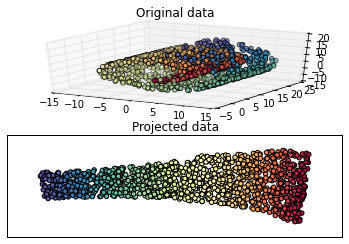

In [2]:
# Author: Fabian Pedregosa -- <fabian.pedregosa@inria.fr>
# License: BSD 3 clause (C) INRIA 2011

print(__doc__)

import matplotlib.pyplot as plt

# This import is needed to modify the way figure behaves
from mpl_toolkits.mplot3d import Axes3D
Axes3D

#----------------------------------------------------------------------
# Locally linear embedding of the swiss roll

from sklearn import manifold, datasets
X, color = datasets.samples_generator.make_swiss_roll(n_samples=1500)

print("Computing LLE embedding")
X_r, err = manifold.locally_linear_embedding(X, n_neighbors=12,
                                             n_components=2)
print("Done. Reconstruction error: %g" % err)

#----------------------------------------------------------------------
# Plot result

fig = plt.figure()
try:
    # compatibility matplotlib < 1.0
    ax = fig.add_subplot(211, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
except:
    ax = fig.add_subplot(211)
    ax.scatter(X[:, 0], X[:, 2], c=color, cmap=plt.cm.Spectral)

ax.set_title("Original data")
ax = fig.add_subplot(212)
ax.scatter(X_r[:, 0], X_r[:, 1], c=color, cmap=plt.cm.Spectral)
plt.axis('tight')
plt.xticks([]), plt.yticks([])
plt.title('Projected data')
plt.show()

In [32]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
img = np.load('mser.npy')
data = img
x = range(data.shape[1])
y = range(data.shape[0])
xv, yv = np.meshgrid(x, y)
xv = np.ndarray.flatten(xv)
yv = np.ndarray.flatten(yv)
data = np.ndarray.flatten(data)

xv = xv[data != 0]
yv = yv[data != 0]
data = data[data != 0]

ind = np.random.choice(range(len(xv)), 1000, replace = False)
xv = xv[ind]
yv = yv[ind]
data = data[ind]


yv = yv[xv > 20]
data = data[xv > 20]
xv = xv[xv > 20]

X = np.asarray([xv, yv]).transpose()
X = np.float64(X)

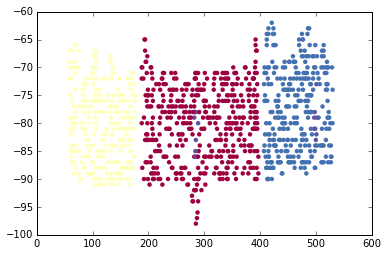

In [33]:
plt.scatter(yv, -xv, c=data, cmap=plt.cm.Spectral, edgecolors = 'none')

In [34]:
x_r = manifold.LocallyLinearEmbedding(n_neighbors = 10, n_components = 2,
                                        eigen_solver='auto',
                                        method='ltsa').fit_transform(X)

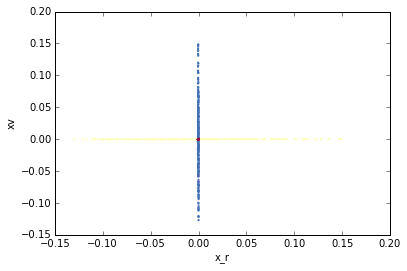

In [35]:
plt.scatter(-x_r[:,0], x_r[:, 1], marker='.', c=data, cmap=plt.cm.Spectral, edgecolors='none'  )
plt.xlabel('x_r')
plt.ylabel('xv')

In [36]:
x_r = manifold.Isomap(n_neighbors = 10, n_components = 2).fit_transform(X)

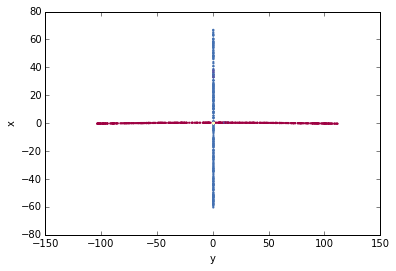

In [37]:
plt.scatter(x_r[:, 0], -x_r[:, 1], marker='.', c=data, cmap=plt.cm.Spectral, edgecolors='none'  )
plt.xlabel('y')
plt.ylabel('x')

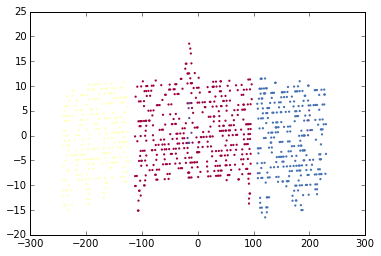

In [38]:
from sklearn.decomposition import PCA, KernelPCA

x_r = PCA().fit_transform(X)
plt.scatter(x_r[:, 0], -x_r[:, 1], marker='.', c=data, cmap=plt.cm.Spectral, edgecolors = 'none')

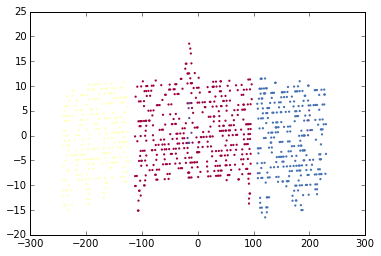

In [53]:
kpca = KernelPCA(kernel="linear", fit_inverse_transform=True, gamma=10)
x_r = kpca.fit_transform(X)
plt.scatter(x_r[:, 0], x_r[:, 1], marker='.', c=data, cmap=plt.cm.Spectral, edgecolors = 'none')

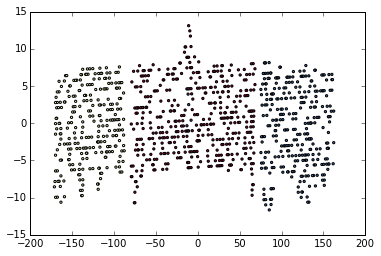

In [55]:
kpca = KernelPCA(kernel="poly", degree = 1)
x_r = kpca.fit_transform(X)
plt.scatter(x_r[:, 0], x_r[:, 1], marker='.', c=data, cmap=plt.cm.Spectral)

(1000, 0)